# Real Estate Ad Research

You have access to data from the Yandex.Real Estate service - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate objects. To do this, conduct a research data analysis and identify the parameters that influence the price of objects. This will allow you to build an automated system: it will track anomalies and fraudulent activities.

For each apartment for sale, two types of data are available. The first are entered by the user, the second are obtained automatically based on mapping data. For example, the distance to the center, airport, and other objects - these data are automatically obtained from geoservices. The number of parks and reservoirs is also filled in without user participation.


### Open the data file and review the general information

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')


pd.set_option('display.max_columns', None) 

# Display the first few rows of the dataframe
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
shape = df.shape 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

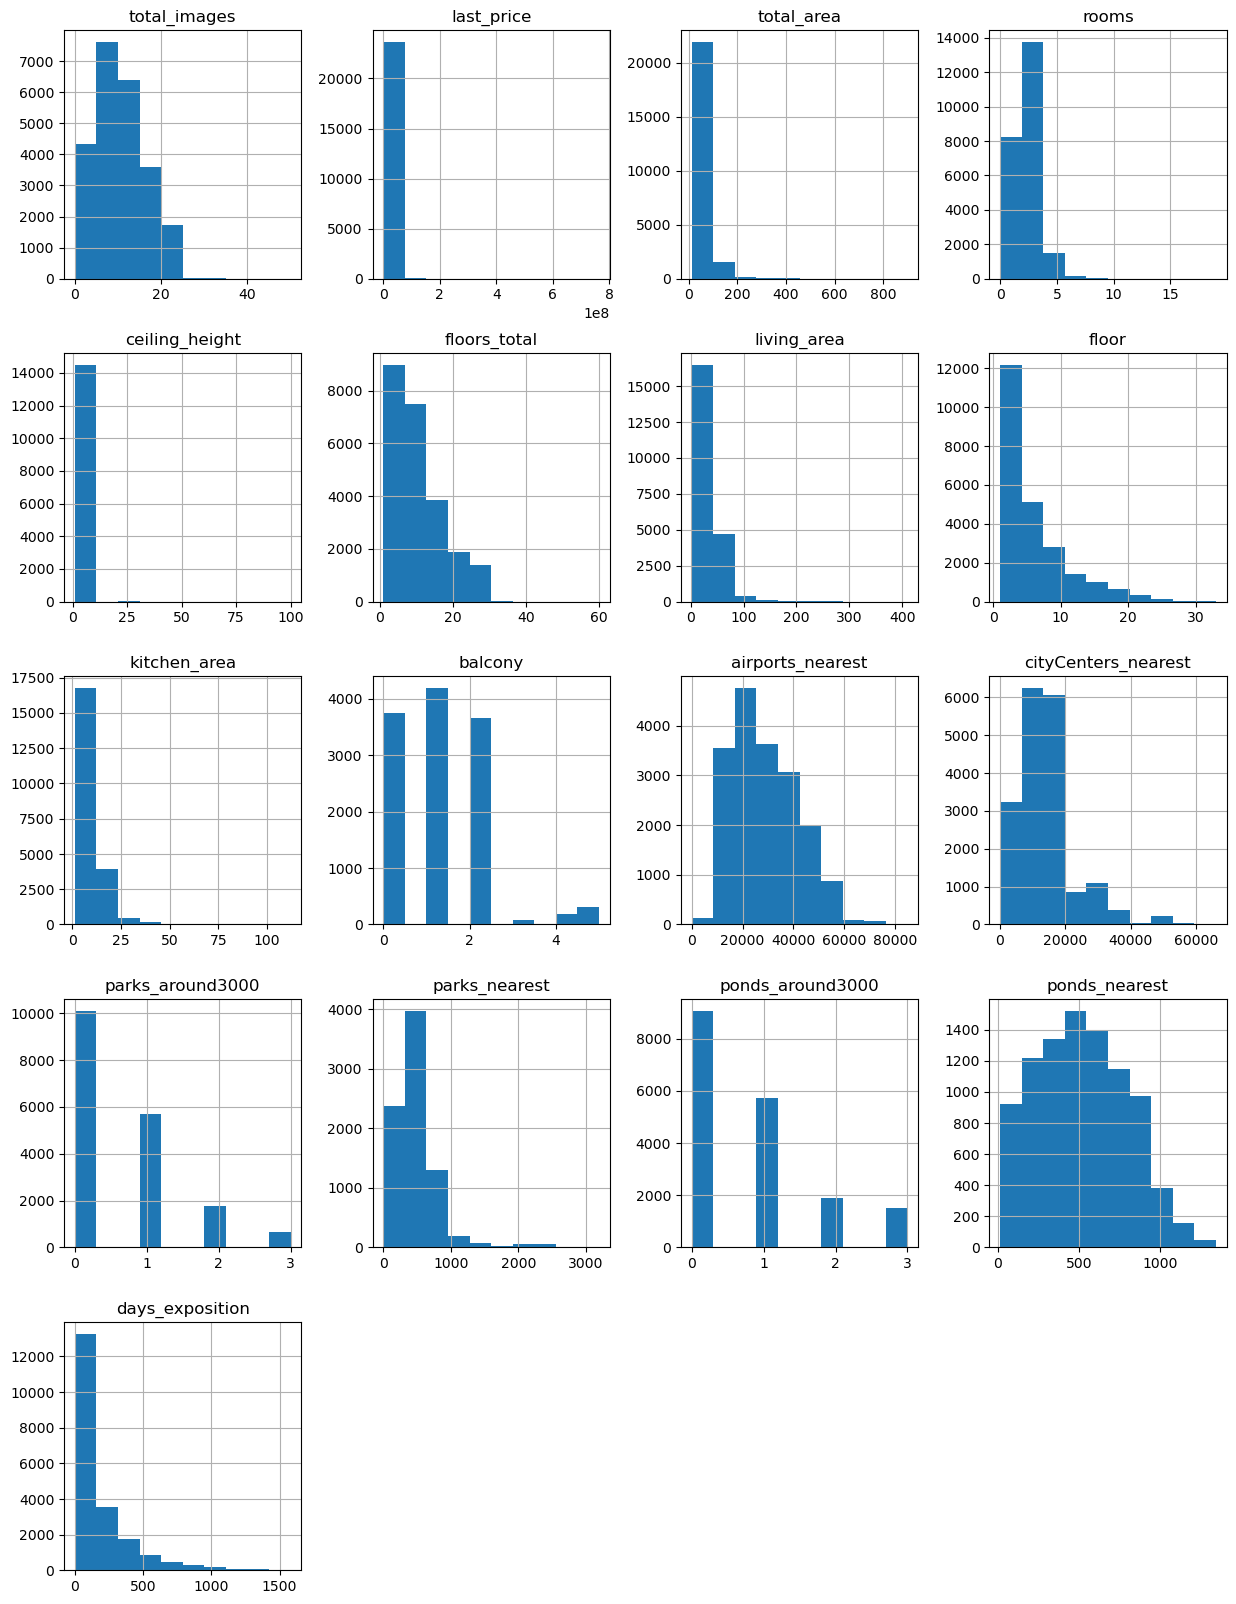

In [6]:
df.hist(figsize=(15, 20))

In [7]:
df.duplicated().sum()

0

By preliminary assessment, the data shows no explicit duplicates, but some columns have missing data and incorrect data types. Some anomalies are also present in the histograms.


### Perform data preprocessing

Let's start with the obvious errors in the column names. `cityCenters_nearest` does not comply with style rules, let's fix this:

In [8]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

Immediately change the data type in columns where it is necessary and possible without additional preprocessing:

In [9]:
df['last_price'].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


The `last_price` column contains integers, so we change the data type to `int`. The `first_day_exposition` column contains date and time data, so we change the data type to `datetime`.

Replace `NaN` values in the `ceiling_height` column with the median ceiling height:


In [10]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

There are unrealistically large values in the ceiling height column. Most likely, there was an error when filling in the data and some values turned out to be an order of magnitude larger than they should be. Let's fix this by dividing all values exceeding 20 by 10:

In [11]:
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Replace missing values in the `floors_total` column with the median number of floors:

In [12]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

Missing values in `living_area` will be left as is for now, as this parameter may be important in pricing. It is better to study the influence of this column on the market value of real estate in more detail later.


Let's check the average number of apartments:

In [13]:
df['is_apartment'].mean()

0.018018018018018018

Since the percentage of apartments is less than 2%, empty values can be replaced with `False`:

In [15]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Replace missing values in `kitchen_area` and `living_area`:

In [16]:
median_living_area = df['living_area'].median()
median_total_area = df['total_area'].median()
ratio1 = median_total_area / median_living_area 
df['living_area'] = df['living_area'].fillna(df['total_area'] / ratio1)

In [17]:
median_kitchen_area = df['kitchen_area'].median()
median_total_area = df['total_area'].median()
ratio2 = median_total_area / median_kitchen_area 
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / ratio2)

A similar situation with the number of balconies in the `balcony` column - missing values most likely mean no balconies. Similarly, we replace missing values with zeros:

In [18]:
df['balcony'] = df['balcony'].fillna(0)

The locality_name column is the names of settlements. There are only 49 values missing in this column (23699-23650). Let's replace these omissions with "unknown":

In [19]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Let's convert the case of all names to lowercase:


In [20]:
df['locality_name'] = df['locality_name'].str.lower()

Let's get rid of explicit duplicates in the names:

In [21]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё','е')
    .replace(['городской поселок ','деревня ', 'коттеджный поселок ', 'поселок ',
             'посёлок городского типа ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ', 'городского типа ', 'при железнодорожной станции ', 'станции '], '', regex=True)
)

Missing values in the `airports_nearest` column may mean that there is no airport in this locality. In this case, it is better to leave the missing values as is.

Missing values in the `city_centers_nearest` column may mean that this property is located outside the city. In this case, we will leave the missing values as is.

Missing values in the `parks_nearest` column may mean that this property is too far from parks. In this case, we will leave the missing values as is.

Missing values in the `ponds_nearest` column will be left unchanged.

Missing values in the `days_exposition` column may mean that this property is too far from ponds. In this case, we will leave the missing values as is.

Let's change the data type of the modified columns:

In [22]:
df['floors_total'].astype('int')
df['is_apartment'].astype('bool')
df['balcony'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Based on the data preprocessing, explicit and implicit duplicates were removed, one of the columns was renamed, the number of missing values in the table was reduced, and data types were changed where necessary. Anomalies found were also processed.

### Add new columns to the table

Let's add a column with the price per square meter to the table:

In [23]:
df['price_sq_m'] = (df['last_price'] / df['total_area']).round(2)

Let's add columns with the day of the week, month, and year of the ad publication:

In [24]:
df['day_publication'] = df['first_day_exposition'].dt.weekday
df['month_publication'] = df['first_day_exposition'].dt.month
df['year_publication'] = df['first_day_exposition'].dt.year

Let's add a column with the type of apartment floor:

In [25]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['type_apartment_floor'] = df.apply(floor, axis=1)

Let's add a column with the distance to the city center in km:

In [26]:
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round(0)


Let's look at the augmented dataset:


In [27]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,day_publication,month_publication,year_publication,type_apartment_floor,distance_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,False,False,27.825,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Conduct exploratory data analysis


**Total area**

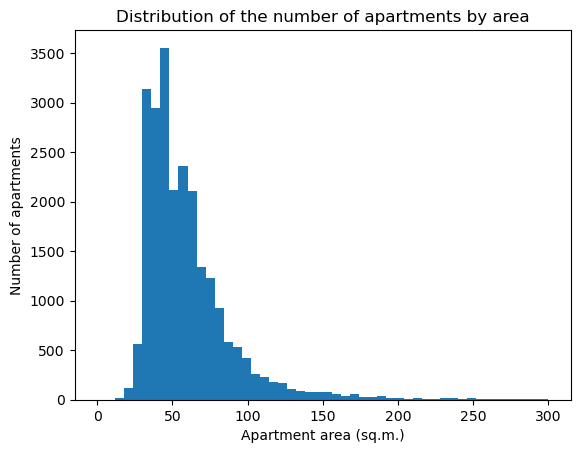

In [28]:
df['total_area'].plot.hist(bins=50, range=(0, 300))
plt. title('Distribution of the number of apartments by area')
plt.xlabel('Apartment area (sq.m.)')
plt.ylabel('Number of apartments')
plt.show()

Most of the apartments for sale have an area of about 55 sq.m. This is followed by apartments with an area of about 30 sq.m and 65 sq.m.


**Living area**


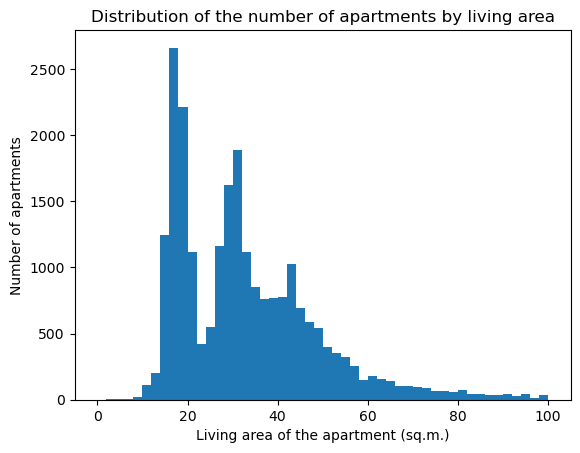

In [29]:
plt.hist(df['living_area'], bins=50, range=(0,100))
plt. title('Distribution of the number of apartments by living area')
plt.xlabel('Living area of the apartment (sq.m.)')
plt.ylabel('Number of apartments')
plt.show()

Most of the apartments for sale have a living area of about 18 sq.m. This is followed by apartments with a living area of about 19 sq.m and 32 sq.m.


**Kitchen area**


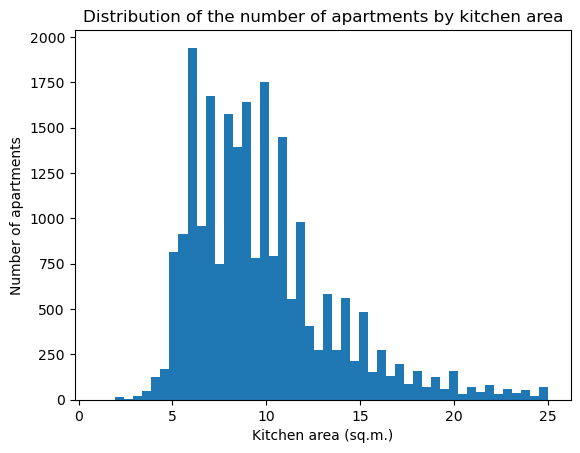

In [30]:
plt.hist(df['kitchen_area'], bins=50, range=(1,25))
plt. title('Distribution of the number of apartments by kitchen area')
plt.xlabel('Kitchen area (sq.m.)')
plt.ylabel('Number of apartments')
plt.show()

Most of the apartments for sale have a kitchen area of about 6 sq.m. This is followed by apartments with a kitchen area of 10 sq.m. Apartments with kitchen areas from 7 to 9 meters are also popular.


**Apartment price**


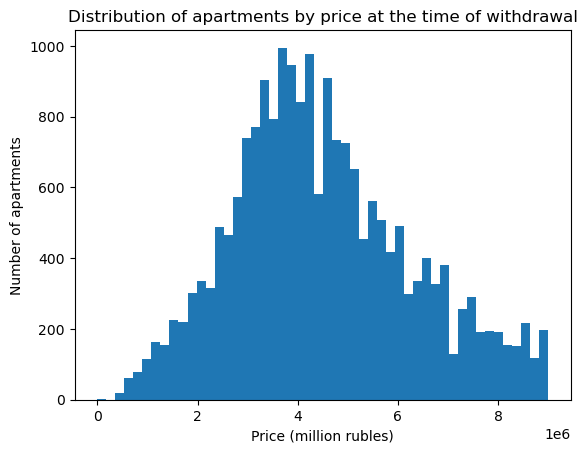

In [31]:
plt.hist(df['last_price'], bins=50, range=(0,9.00000e+06))
plt.title('Distribution of apartments by price at the time of withdrawal')
plt.xlabel('Price (million rubles)')
plt.ylabel('Number of apartments')
plt.show()

Most of the ads are for apartments priced at around 4 million.


**Number of rooms**


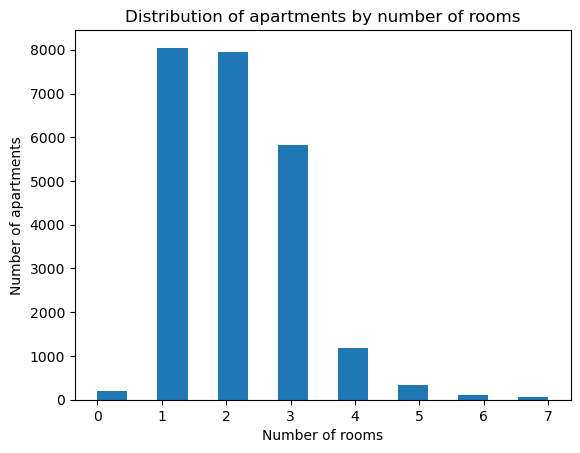

In [32]:
plt.hist(df['rooms'], bins=15, range=(0,7))
plt. title('Distribution of apartments by number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Number of apartments')
plt.show()

Most of the ads are for 1-room and 2-room apartments.


**Ceiling height**


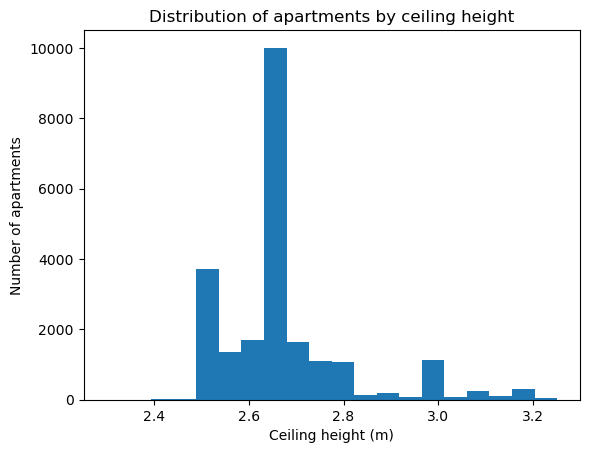

In [33]:
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20, range=(2.3,3.25))
plt. title('Distribution of apartments by ceiling height')
plt.xlabel('Ceiling height (m)')
plt.ylabel('Number of apartments')
plt.show()

The most common ceiling height among ads is 2.65 meters.

**Apartment floor type**


Since there are only three categories, it will be more illustrative to build a pie chart.

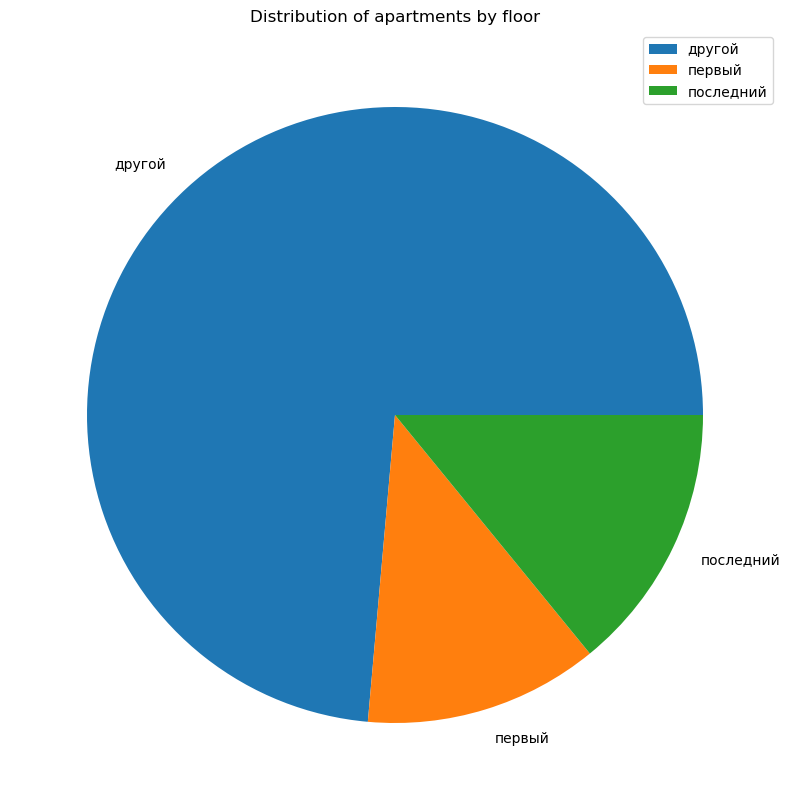

In [34]:
df.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(15,10), label='', title='Distribution of apartments by floor')
plt.show()

**Number of floors in the building**

Most of the apartments for sale are in five-story buildings.


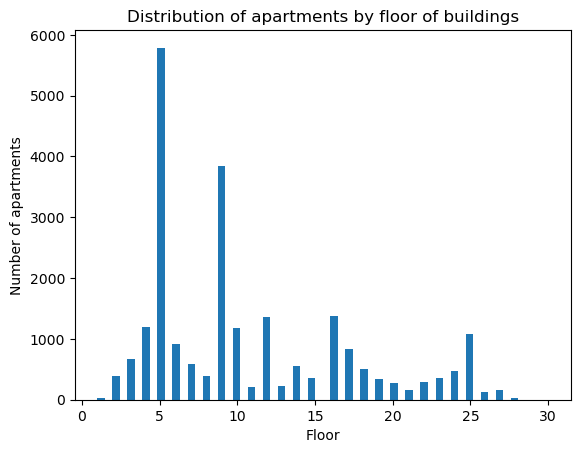

In [36]:
plt.hist(df['floors_total'], bins=60, range=(1,30))
plt. title('Distribution of apartments by floor of buildings')
plt.xlabel('Floor')
plt.ylabel('Number of apartments')
plt.show()

Most of the apartments for sale are in five-story buildings.


**Distance to the city center**


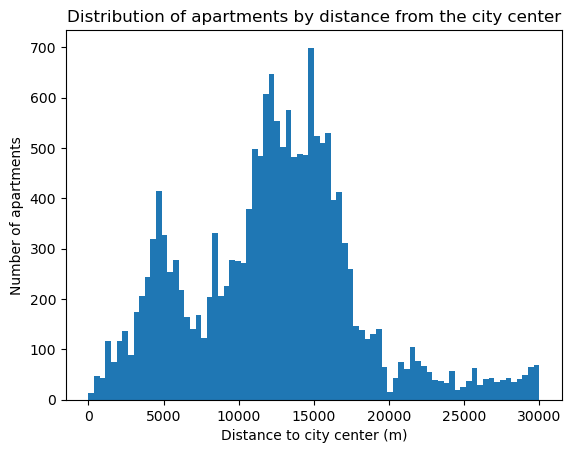

In [37]:
plt.hist(df['city_centers_nearest'], bins=80, range=(0,30000))
plt. title('Distribution of apartments by distance from the city center')
plt.xlabel('Distance to city center (m)')
plt.ylabel('Number of apartments')
plt.show()

As can be seen from the graph, the most expensive apartments are in the center. The cost of apartments decreases with increasing distance from the city center. Starting from a distance of 10 km, the cost practically does not change. There is a small increase in value at 27-28 km from the city, which may be due to luxury housing on the outskirts of the city.


**Distance to the neares park**

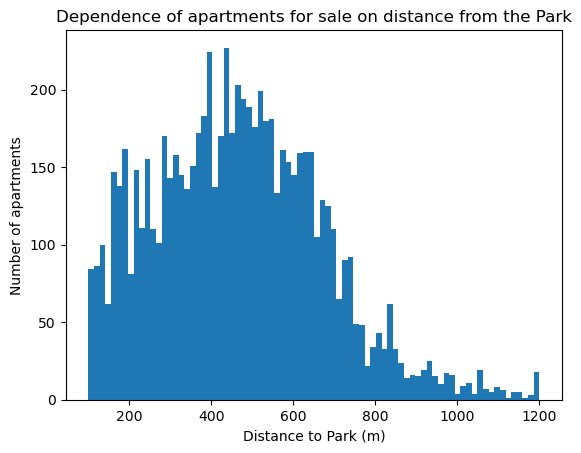

In [38]:
plt.hist(df['parks_nearest'], bins=80, range=(100,1200))
plt. title('Dependence of apartments for sale on distance from the Park')
plt.xlabel('Distance to Park (m)')
plt.ylabel('Number of apartments')
plt.show()

Most apartments are 200 to 650 meters away from parks.

Let's compare the shapes of the original and modified datasets:


In [35]:
shape2 = df.shape 

In [36]:
print('\nOriginal DataFrame Shape :', shape)
print('\nOriginal Number of rows :', shape[0]) 
print('\nOriginal Number of columns :', shape[1])
print('\nNew DataFrame Shape :', shape2)
print('\nNew Number of rows :', shape2[0]) 
print('\nNew Number of columns :', shape2[1])


Original DataFrame Shape : (23699, 22)

Original Number of rows : 23699

Original Number of columns : 22

New DataFrame Shape : (23699, 28)

New Number of rows : 23699

New Number of columns : 28


The number of data points in the new dataset allows for further data analysis.


# Investigation of how quickly apartments were sold


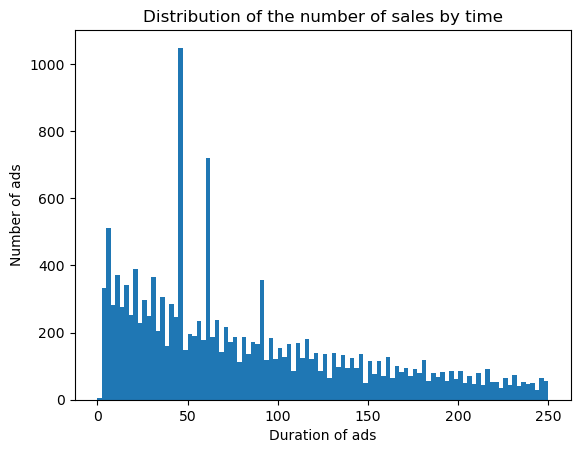

In [39]:
plt.hist(df['days_exposition'], bins=100, range=(0,250))
plt. title('Distribution of the number of sales by time')
plt.xlabel('Duration of ads')
plt.ylabel('Number of ads')
plt.show()

In [38]:
print(df['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


On average, apartments are sold in 95 days (median value). The histogram shows peaks in ad removal on days 45 and 60. Sales within 45 days can be considered fast (first quartile), and extremely long sales are those from 230 days (fourth quartile).


**Factors that most influence the total (full) cost of an object.**


Let's study the dependence of the price on:
total area;
living area;
kitchen area;
number of rooms;
floor on which the apartment is located (first, last, other);
publication date (day of the week, month, year).

In [40]:
target_column = 'last_price'
numerical_cols = ['total_area', 'living_area', 'rooms', 
                  'floors_total', 'kitchen_area', 'days_exposition', 'price_sq_m', 
                  'distance_city_center']
filtered_df = df[numerical_cols]
for col in filtered_df:
  
  if col != target_column:
    
    correlation = df[target_column].corr(df[col])
    
    print(f"Correlation between '{ target_column}' and '{ col}': {correlation:.2f}")

Correlation between 'last_price' and 'total_area': 0.65
Correlation between 'last_price' and 'living_area': 0.59
Correlation between 'last_price' and 'rooms': 0.36
Correlation between 'last_price' and 'floors_total': -0.01
Correlation between 'last_price' and 'kitchen_area': 0.51
Correlation between 'last_price' and 'days_exposition': 0.08
Correlation between 'last_price' and 'price_sq_m': 0.74
Correlation between 'last_price' and 'distance_city_center': -0.21


The correlation coefficients have barely changed, meaning the original data had few outliers.
The correlation between the selling price and the total area of the apartment is moderate.
The correlation between the selling price and the living area of the apartment is moderate.
The correlation between the price per square meter and the selling price of the apartment is moderate.
The correlation between the selling price of the apartment and the number of rooms is weak.
The correlation between other parameters and the selling price of the apartment is very weak.


Let's look at the correlation between price and publication date:


In [41]:
target_column = 'last_price'
numerical_cols = ['day_publication', 'month_publication', 'year_publication']
filtered_df = df[numerical_cols]
for col in filtered_df:
  
  if col != target_column:
    
    correlation = df[target_column].corr(df[col])
    
    print(f"Correlation between '{ target_column}' and '{ col}': {correlation:.2f}")

Correlation between 'last_price' and 'day_publication': 0.00
Correlation between 'last_price' and 'month_publication': 0.00
Correlation between 'last_price' and 'year_publication': -0.04


No correlation is observed between price and publication date.

Let's build scatter plots:


In [41]:
def filter_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    filtered_df = df.loc[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr), :]
    return filtered_df
for col in numerical_cols:
    filtered_df = filter_iqr(df.copy(), col)
    correlation = filtered_df[target_column].corr(filtered_df[col])
    print(f"Correlation between '{ target_column}' and '{ col}' : {correlation:.2f}")

Корреляция между 'last_price' и 'day_publication' : 0.00
Корреляция между 'last_price' и 'month_publication' : 0.00
Корреляция между 'last_price' и 'year_publication' : -0.01


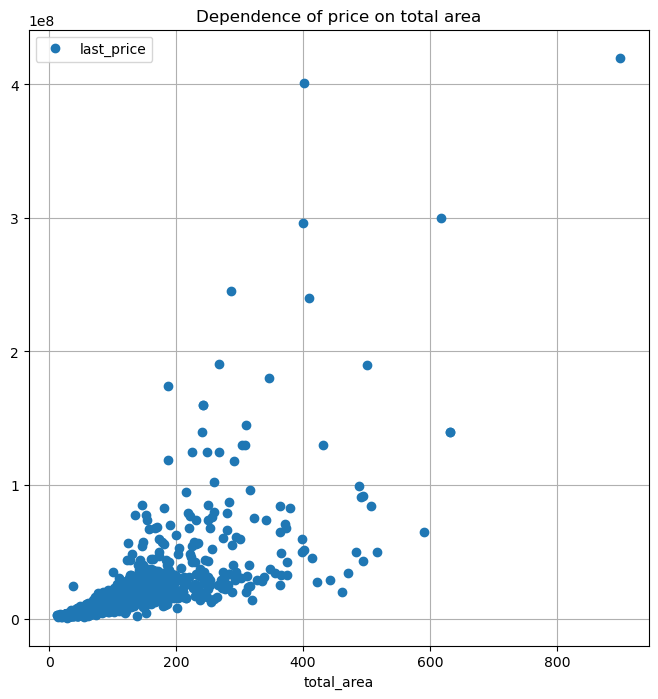

In [42]:
(df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(8, 8)))
plt. title('Dependence of price on total area')
plt.show()

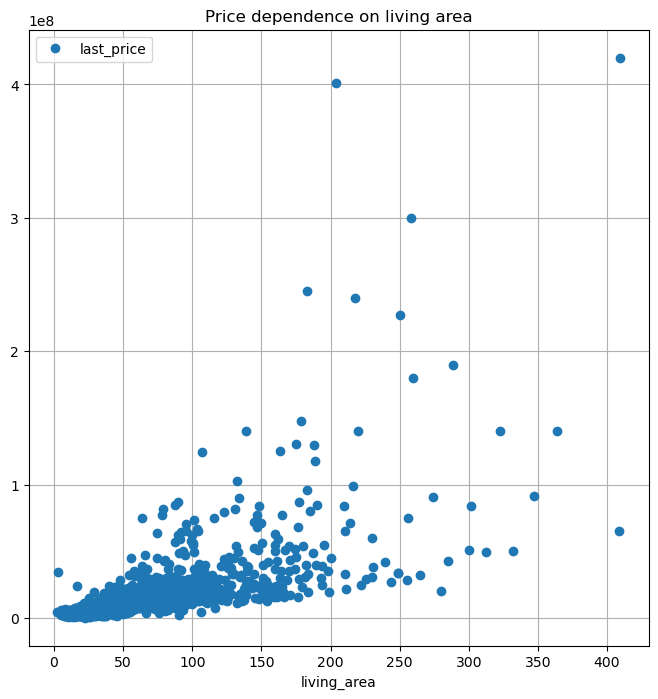

In [43]:
(df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(8, 8)))
plt. title('Price dependence on living area')
plt.show()

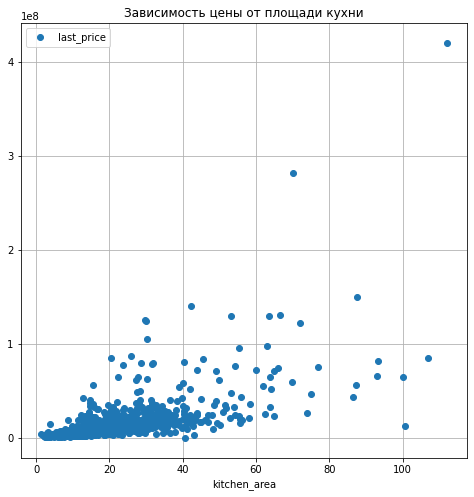

In [44]:
(df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(8, 8)))
plt.title('Зависимость цены от площади кухни')
plt.show()

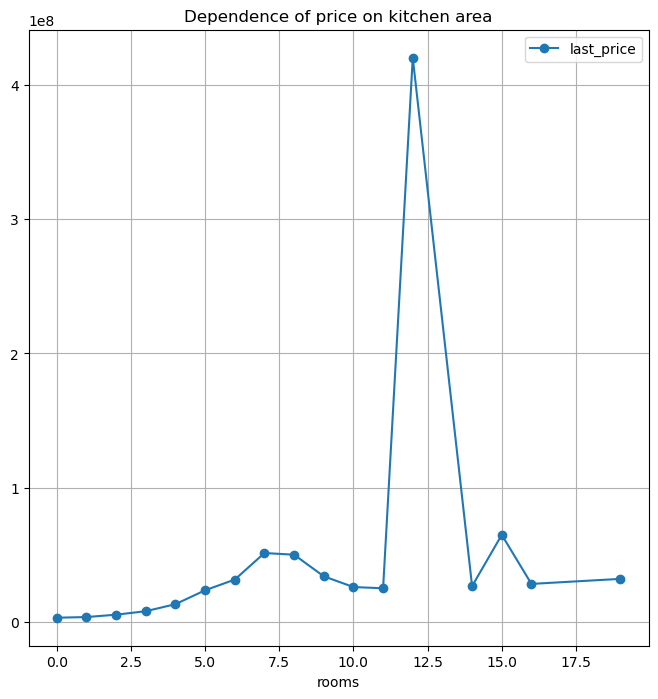

In [44]:
(df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(8, 8)))
plt. title('Dependence of price on kitchen area')
plt.show()

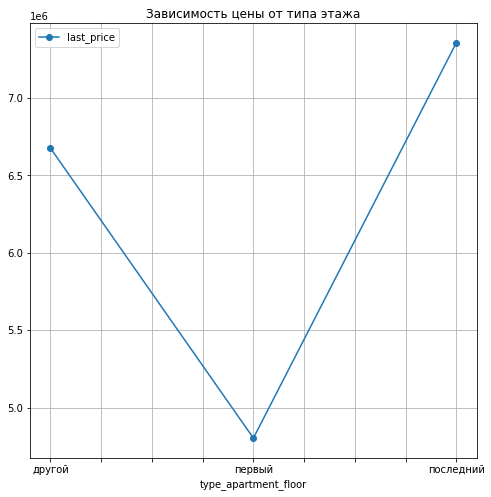

In [46]:
(df.pivot_table(index='type_apartment_floor', values='last_price').plot(grid=True, style='o-', figsize=(8, 8)))
plt.title('Зависимость цены от типа этажа')
plt.show()

It is well seen that the price of apartments on the ground floor and top floor is lower than the other floors.

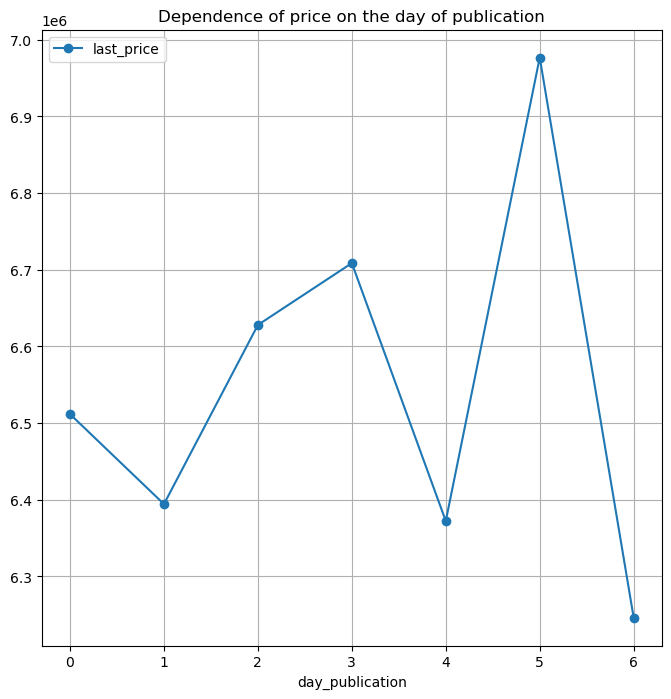

In [45]:
(df.pivot_table(index='day_publication', values='last_price').plot(grid=True, style='o-', figsize=(8, 8)))
plt. title('Dependence of price on the day of publication')
plt.show()

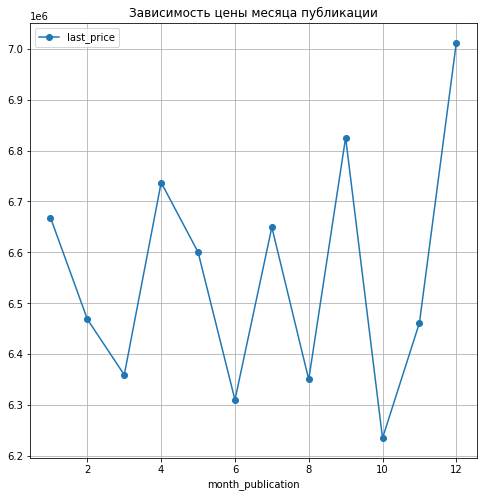

In [48]:
(df.pivot_table(index='month_publication', values='last_price').plot(grid=True, style='o-', figsize=(8, 8)))
plt.title('Зависимость цены месяца публикации')
plt.show()

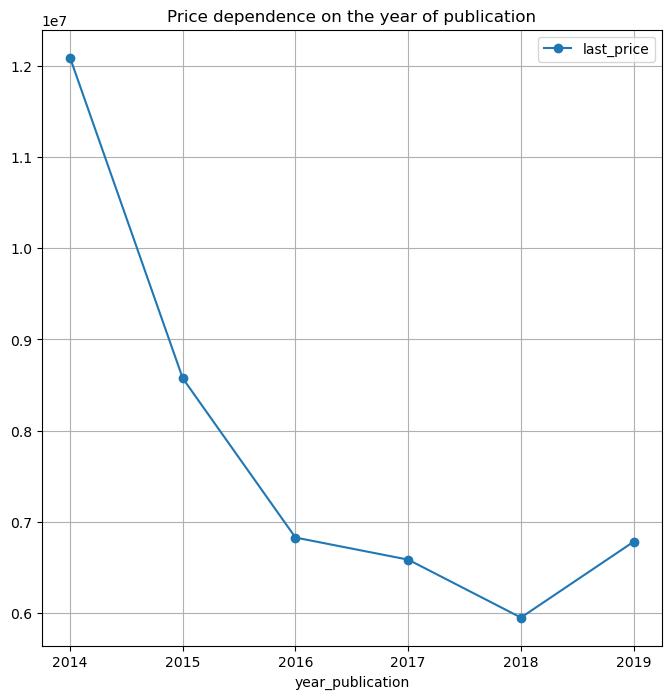

In [46]:
(df.pivot_table(index='year_publication', values='last_price').plot(grid=True, style='o-', figsize=(8, 8)))
plt. title('Price dependence on the year of publication')
plt.show()

The price trend by year is clearly visible: from 2014 to 2017 there was a sharp decline, and from 2018 to 2019 the price started to climb.

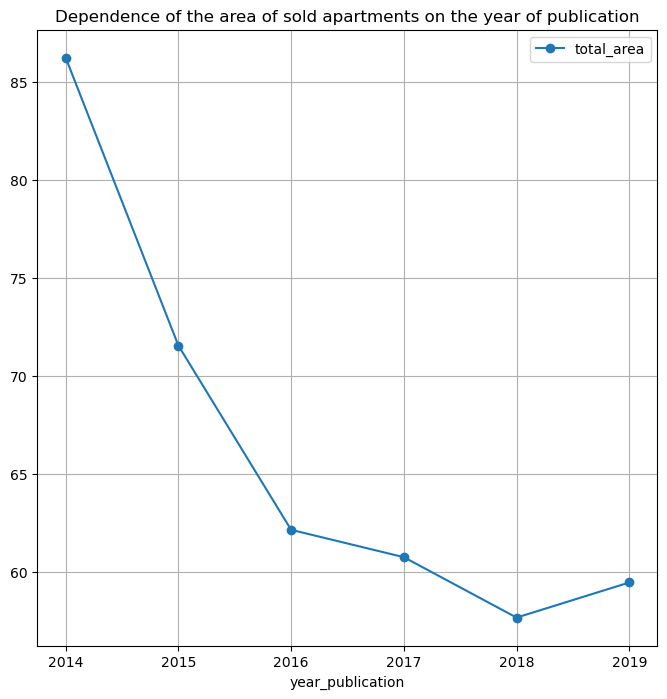

In [47]:
(df.pivot_table(index='year_publication', values='total_area').plot(grid=True, style='o-', figsize=(8, 8)))
plt. title('Dependence of the area of sold apartments on the year of publication')
plt.show()

The year-on-year price trend coincides with a decrease in the area of the flats sold: from 2014 to 2018, the area of the flats sold fell from 87 square metres to 55 square metres.


**Let's calculate the average price per square meter in the 10 settlements with the largest number of ads.**


In [48]:
price_sqm_locality = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sqm_locality.columns = ['count']
price_sqm_locality = price_sqm_locality.sort_values(by='count', ascending=False).head(10)
price_sqm_locality['price_sq_m'] = df.pivot_table(index='locality_name', values='price_sq_m').round(2)
price_sqm_locality.sort_values(by='price_sq_m', ascending=False)


,count,price_sq_m
locality_name,,
санкт-петербург,15721,114849.01
пушкин,369,103125.82
кудрово,472,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,338,75424.58
гатчина,307,68746.15
всеволожск,398,68654.47


The most expensive per square meter of housing in St. Petersburg. The lowest cost per meter of housing in Vyborg.

Let's calculate the average cost of apartments in St. Petersburg depending on the distance from the city center.

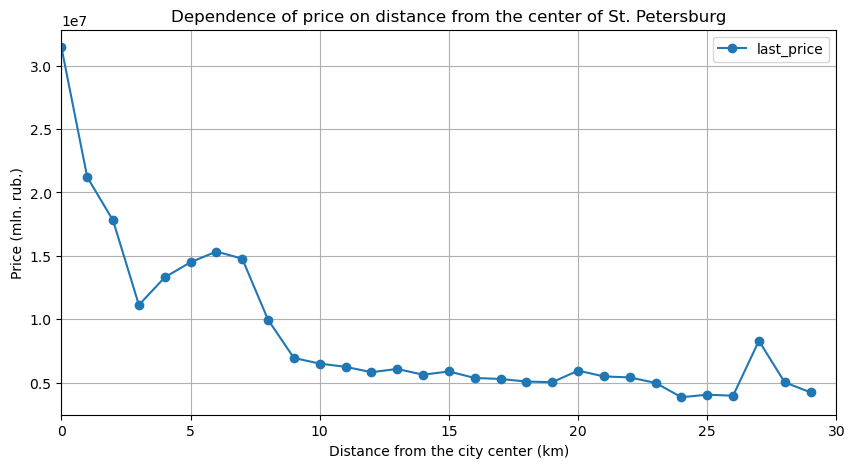

In [49]:
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 5))
)
plt. title('Dependence of price on distance from the center of St. Petersburg')
plt.xlabel('Distance from the city center (km)')
plt.ylabel('Price (mln. rub.)')
plt.show()

As can be seen from the chart, the most expensive apartments are in the center. The cost of apartments decreases with distance from the city center. Starting from a distance of 10 km the cost practically does not change. There is a slight increase in the cost at 27-28 km from the city, which may be associated with elite housing on the outskirts of the city.

### Conclusion:

An analysis of apartment sale ads was conducted according to the following steps:
#### Preliminary data analysis was performed
- It was found that the data for a number of columns had missing values and incorrect data types. No explicit duplicates were found.
#### Data preprocessing was performed:
- The `cityCenters_nearest` column was renamed to `city_centers_nearest`.
- Explicit missing values in the data were filled.
- The data type of the columns was changed to the correct one.
- The appearance of missing values is most likely due to human factors - people who placed the ad did not fill in all the fields.
#### New columns were added
- `price_square_meter` - price per square meter of the object
- `day_publication` - day of the week of ad publication
- `month_publication` - month of ad publication
- `year_publication` - year of ad publication
- `type_apartment_floor` - type of apartment floor
- `distance_city_center` - distance to the city center in whole kilometers
#### Exploratory data analysis was performed
- Most of the apartments for sale have an area of about 55 sq.m. This is followed by apartments with an area of about 30 sq.m and 65 sq.m.
- Most of the apartments for sale have a living area of about 18 sq.m. This is followed by apartments with a living area of about 19 sq.m and 32 sq.m.
- Most of the apartments for sale have a kitchen area of about 6 sq.m. This is followed by apartments with a kitchen area of 10 sq.m. Apartments with kitchen areas from 7 to 9 meters are also popular.
- Most of the ads are for apartments priced at around 4 million.
- Most of the ads are for 1-room and 2-room apartments.
- The most common ceiling height among ads is 2.6 meters.
- Apartments on the first and last floors make up a total of approximately 25% of the total number of apartments. The price of apartments on the first and last floors is lower than on other floors.
- Most of the apartments for sale are in five-story buildings.
- Most of the offers for sale are at a distance of 12-15 kilometers. There are also many ads for apartments within 5 kilometers of the center.
- A larger number of apartments are located 200 to 650 meters from parks.
- On average, apartments are sold in 95 days (median value). The histogram shows peaks in ad removal on days 45 and 60. Sales within 45 days can be considered fast (first quartile), and extremely long sales are those from 230 days (fourth quartile).
- The correlation between the selling price and the total area of the apartment is moderate, the correlation between the selling price and the living area of the apartment is moderate, the correlation between the price per square meter and the selling price of the apartment is moderate, the correlation between the selling price of the apartment and the number of rooms is weak. The correlation between other parameters and the selling price of the apartment is very weak.
- The trend of price changes over the years was shown: from 2014 to 2017 there was a sharp decline, and from 2017 to 2019 prices began to rise.
- The average price per square meter was calculated in the 10 settlements with the largest number of ads:
    - The most expensive square meter of housing is in St. Petersburg. The lowest cost per square meter of housing is in Vyborg.
    - It was shown that the most expensive apartments are in the center. The cost of apartments decreases with increasing distance from the city center. Starting from a distance of 10 km, the cost practically does not change. There is a small increase in value at 27-28 km from the city, which may be due to luxury housing on the outskirts of the city.





